<a href="https://colab.research.google.com/github/GuhanSelvam/Monthly_to_Weekly_Data_Comparison/blob/main/monthly_to_weekly_data_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

def days_in_month(date_obj):
    """
    Calculates the number of days in a month given a datetime object.

    Args:
        date_obj (datetime): A datetime object.

    Returns:
        int: Number of days in the month.
    """
    return pd.Period(date_obj, freq='M').days_in_month
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Daily_Production'] = df['Monthly_Production'] / df['Date'].apply(days_in_month)
df['Date'] = df['Date'].dt.strftime('%b-%Y').str.lower()

start_date = 'jan-2024'
end_date = 'dec-2024'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print(filtered_df)
print(df.tail(12))

Saving MCRRIUS1.csv to MCRRIUS1 (1).csv
Empty DataFrame
Columns: [Date, Monthly_Production, Daily_Production]
Index: []
         Date  Monthly_Production  Daily_Production
513  oct-2023              476064      15356.903226
514  nov-2023              478115      15937.166667
515  dec-2023              511557      16501.838710
516  jan-2024              477381      15399.387097
517  feb-2024              431574      14881.862069
518  mar-2024              491803      15864.612903
519  apr-2024              476453      15881.766667
520  may-2024              518273      16718.483871
521  jun-2024              504446      16814.866667
522  jul-2024              513617      16568.290323
523  aug-2024              522000      16838.709677
524  sep-2024              486017      16200.566667


In [ ]:
import pandas as pd
from datetime import datetime
from google.colab import files
uploaded1= files.upload()
filename1= list(uploaded1.keys())[0]
df1 = pd.read_csv(filename1)
print(df1.tail(12))

Saving WCRRIUS21.csv to WCRRIUS21 (1).csv
             Date       WTI
2191  Sep 20, 2024  16353.0
2192  Sep 27, 2024  15691.0
2193  Oct 04, 2024  15590.0
2194  Oct 11, 2024  15755.0
2195  Oct 18, 2024  16084.0
2196  Oct 25, 2024  16053.0
2197  Nov 01, 2024  16334.0
2198  Nov 08, 2024  16509.0
2199  Nov 15, 2024  16228.0
2200  Nov 22, 2024  16295.0
2201  Nov 29, 2024  16910.0
2202  Dec 06, 2024  16659.0


In [ ]:
import pandas as pd
print(df1.columns)
df1['Date'] = pd.to_datetime(df1['Date '], format='%b %d, %Y')
monthly_data = df1.resample('M', on='Date')['WTI'].sum()
print(monthly_data)

Index(['Date ', 'WTI'], dtype='object')
Date
1982-08-31    23640.0
1982-09-30    12375.0
1982-10-31    59870.0
1982-11-30    46864.0
1982-12-31    59188.0
               ...   
2024-08-31    83322.0
2024-09-30    65280.0
2024-10-31    63482.0
2024-11-30    82276.0
2024-12-31    16659.0
Name: WTI, Length: 509, dtype: float64


<ipython-input-63-65d179827d84>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df1.resample('M', on='Date')['WTI'].sum()


In [ ]:


print(df1.columns)
df1['Date'] = pd.to_datetime(df1['Date '], format='%b %d, %Y')
monthly_data = df1.resample('M', on='Date')['WTI'].sum()
monthly_data.index = monthly_data.index.strftime('%b-%Y')
print(monthly_data)

Index(['Date ', 'WTI', 'Date'], dtype='object')
Date
Aug-1982    23640.0
Sep-1982    12375.0
Oct-1982    59870.0
Nov-1982    46864.0
Dec-1982    59188.0
             ...   
Aug-2024    83322.0
Sep-2024    65280.0
Oct-2024    63482.0
Nov-2024    82276.0
Dec-2024    16659.0
Name: WTI, Length: 509, dtype: float64


<ipython-input-69-5ca86d0d8d85>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df1.resample('M', on='Date')['WTI'].sum()


In [ ]:
df1.rename(columns={'WTI': 'Monthly_Production'}, inplace=True)
print(df1.columns)

Index(['Date ', 'Monthly_Production', 'Date'], dtype='object')


In [ ]:
df1.rename(columns={'WTI': 'Monthly_Production'}, inplace=True)

In [ ]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])
if 'Date ' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date '], format='%b %d, %Y')
    df1.drop(columns=['Date '], inplace=True)
    df1.set_index('Date', inplace=True)
elif 'Date' not in df1.columns:
    df1['Date'] = pd.to_datetime(df1.index, format='%b %d, %Y')
    df1.set_index('Date', inplace=True)
else:
    df1.set_index('Date', inplace=True)
df.set_index('Date', inplace=True)
merged_df = pd.merge(df, df1, left_index=True, right_index=True, how='inner')
merged_df.rename(columns={'Monthly_Production_x': 'Monthly_Production_df',
                          'Monthly_Production_y': 'Monthly_Production_df1'}, inplace=True)
merged_df['Deviation'] = merged_df['Monthly_Production_df1'] - merged_df['Monthly_Production_df']

print(merged_df)


            Monthly_Production_df  Daily_Production  Monthly_Production_df1  \
Date                                                                          
1982-10-01                 364221      11749.064516                 12303.0   
1983-04-01                 343000      11433.333333                 10927.0   
1983-07-01                 383152      12359.741935                 12340.0   
1984-06-01                 367649      12254.966667                 12842.0   
1985-02-01                 318271      11366.821429                 11555.0   
...                           ...               ...                     ...   
2022-04-01                 469449      15648.300000                 15948.0   
2022-07-01                 507098      16358.000000                 16438.0   
2023-09-01                 487179      16239.300000                 16623.0   
2023-12-01                 511557      16501.838710                 16201.0   
2024-03-01                 491803      15864.612903 

<ipython-input-47-21f66969bceb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
last_20_rows = - merged_df.tail(20)

# Print the last 20 rows of the deviation
print(last_20_rows)

            Monthly_Production_df  Daily_Production  Monthly_Production_df1  \
Date                                                                          
2013-11-01                -468989     -15632.966667                -15068.0   
2014-08-01                -510271     -16460.354839                -16393.0   
2015-05-01                -508450     -16401.612903                -16347.0   
2016-01-01                -494490     -15951.290323                -16617.0   
2016-04-01                -477608     -15920.266667                -16433.0   
2016-07-01                -515257     -16621.193548                -16687.0   
2017-09-01                -463806     -15460.200000                -14472.0   
2017-12-01                -535506     -17274.387097                -17195.0   
2018-06-01                -529970     -17665.666667                -17369.0   
2019-02-01                -443681     -15845.750000                -16633.0   
2019-03-01                -493975     -15934.677419 

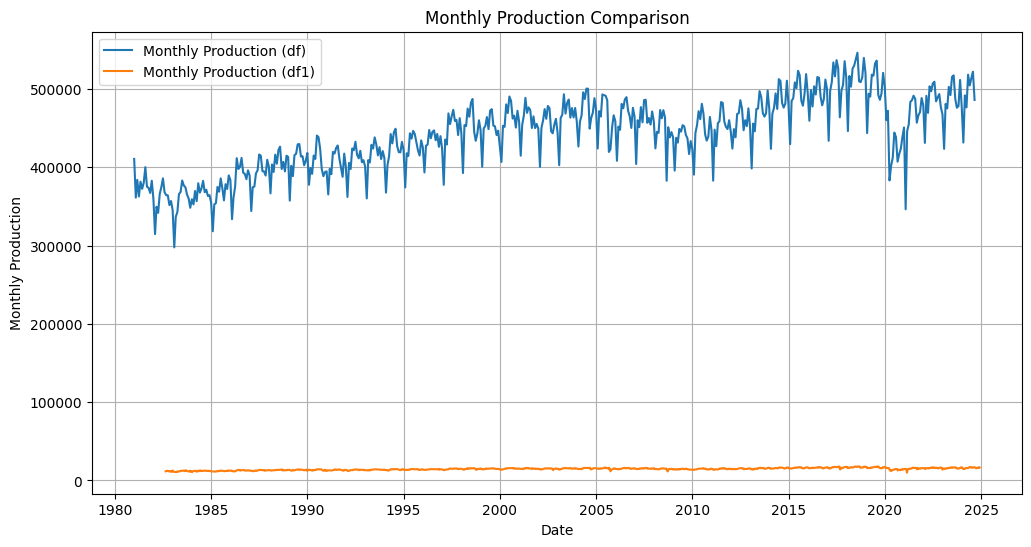

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Monthly_Production'], label='Monthly Production (df)')
plt.plot(df1['Monthly_Production'], label='Monthly Production (df1)')
plt.xlabel('Date')
plt.ylabel('Monthly Production')
plt.title('Monthly Production Comparison')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-41-59ee55dee902>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_weekly_monthly = df_weekly.resample('M').sum()


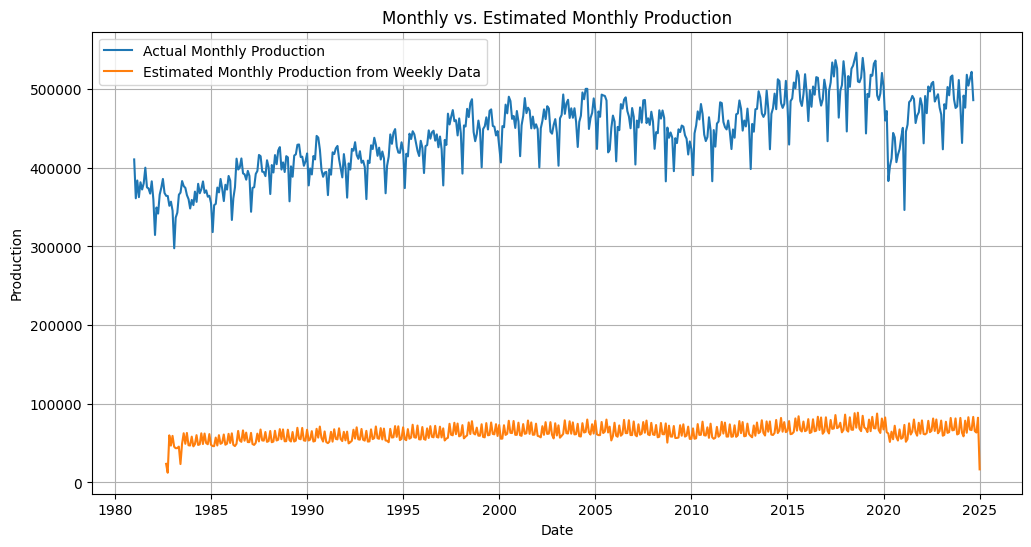

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_monthly = df.copy()
df_weekly = df1.copy()
df_monthly = df_monthly.reset_index()
df_weekly = df_weekly.reset_index()
df_monthly['Date'] = pd.to_datetime(df_monthly['Date'])
df_weekly['Date'] = pd.to_datetime(df_weekly['Date'])
df_monthly.set_index('Date', inplace=True)
df_weekly.set_index('Date', inplace=True)
df_weekly_monthly = df_weekly.resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Monthly_Production'], label='Actual Monthly Production')
plt.plot(df_weekly_monthly['Monthly_Production'], label='Estimated Monthly Production from Weekly Data') # Changed column name here to 'Monthly_Production'
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Monthly vs. Estimated Monthly Production')
plt.legend()
plt.grid(True)
plt.show()